<a href="https://colab.research.google.com/github/ShubhamOulkar/Customer-Loans_Status-Predictions/blob/main/customer_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Function to plot confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Collection', 'Paidoff']); ax.yaxis.set_ticklabels(['Collection', 'Paidoff'])

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [6]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [7]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [8]:
features = df[['Principal','terms','age','Gender','dayofweek','weekend','education']]
features_one_hot = pd.get_dummies(features, columns = ['education'])
features_one_hot

,Principal,terms,age,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,3,0,0,1,0,0
1,1000,30,33,1,3,0,1,0,0,0
2,1000,15,27,0,3,0,0,0,0,1
3,1000,30,28,1,4,1,0,0,0,1
4,1000,30,29,0,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
341,800,15,32,0,6,1,0,1,0,0
342,1000,30,25,0,6,1,0,1,0,0
343,800,15,39,0,0,0,0,0,0,1
344,1000,30,28,0,0,0,0,0,0,1


In [9]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot

,Principal,terms,age,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1000.0,30.0,45.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
1,1000.0,30.0,33.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
2,1000.0,15.0,27.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
3,1000.0,30.0,28.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0
4,1000.0,30.0,29.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
341,800.0,15.0,32.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0
342,1000.0,30.0,25.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0
343,800.0,15.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
344,1000.0,30.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
Y = df['loan_status'].to_numpy()
Y[0:345:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Standardize features by removing the mean and scaling to unit variance.
# Z-score 
transform = preprocessing.StandardScaler()

In [12]:
features_one_hot = transform.fit_transform(features_one_hot)
features_one_hot

array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(features_one_hot, Y, test_size = 0.2, random_state = 2)

# Logistic Regression

In [14]:
parameters ={'C':[0.0001,0.001,0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr ,parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.732010582010582


In [16]:
acc_logreg_test_data = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_logreg_test_data)

Accuracy on test data : 0.8285714285714286


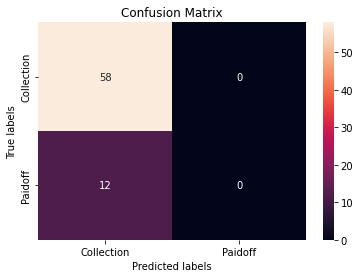

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# SVM

In [ ]:
parameters = {'kernel':('sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [ ]:
acc_svm_test_data = svm_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_svm_test_data)

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Decision Tree

In [18]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [19]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [20]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.7753968253968253


In [21]:
acc_tree_test_data = tree_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_tree_test_data)

Accuracy on test data : 0.7142857142857143


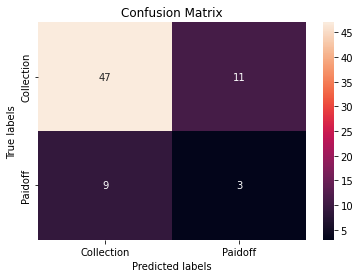

In [22]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# KNN

In [23]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()

In [24]:
knn_cv = GridSearchCV(knn, parameters, cv =10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [25]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'brute', 'n_neighbors': 4, 'p': 2}
accuracy : 0.7462962962962962


In [26]:
acc_knn_test_data = knn_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_knn_test_data)

Accuracy on test data : 0.7714285714285715


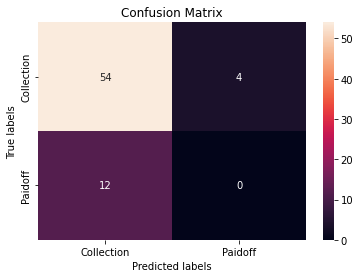

In [27]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [31]:
methods = ['Logreg','Tree','Knn']
accs_train = [logreg_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]
accs_test = [acc_logreg_test_data , acc_tree_test_data, acc_knn_test_data]

dict_meth_accs = {}

for i in range(len(methods)):
    dict_meth_accs[methods[i]] = [accs_train[i], accs_test[i]]

df = pd.DataFrame.from_dict(dict_meth_accs, orient='index')
df.rename(columns={0: 'Accuracy Train', 1: 'Accuracy Test'}, inplace = True)

df.head()

,Accuracy Train,Accuracy Test
Logreg,0.732011,0.828571
Tree,0.775397,0.714286
Knn,0.746296,0.771429
